In [1]:
import qiskit as q
#%matplotlib inline

circuit = q.QuantumCircuit(2, 2)  # 2 quibits, 2 classical bits

# currently: 0,0
circuit.x(0) 
# 1,0
circuit.cx(0, 1) # cnot, controlled not. Flips 2d qubit value IF first qubit is a 1
# 1, 1
circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

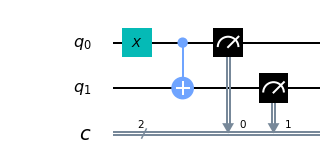

In [2]:
circuit.draw(output="mpl")

In [3]:
from qiskit import IBMQ

IBMQ.save_account(open("Quantumtoken.txt","r").read())

Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated" 
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 2 queued and 5 qubits
ibmq_16_melbourne has 10 queued and 15 qubits
ibmq_vigo has 9 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_london has 1 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 1 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits


In [6]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_essex")
job = q.execute(circuit, backend=backend, shots= 500)
job_monitor(job)

Job Status: job has successfully run


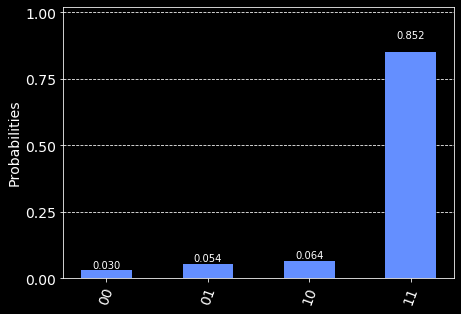

In [7]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [8]:
# change the circuit a bit

circuit = q.QuantumCircuit(2, 2)  # 2 quibits, 2 classical bits

# currently: 0,0
circuit.h(0) 
# 1,0
circuit.cx(0, 1) # cnot, controlled not. Flips 2d qubit value IF first qubit is a 1
# 1, 1
circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

In [9]:
job = q.execute(circuit, backend= backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


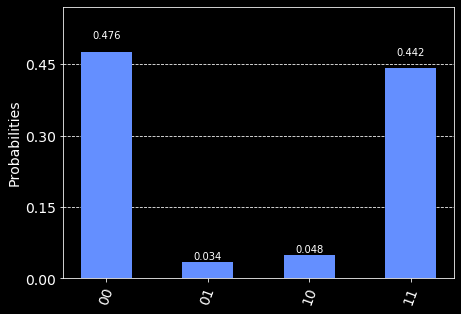

In [10]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [11]:
from qiskit import Aer  # Simulator framework for qiskit

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run


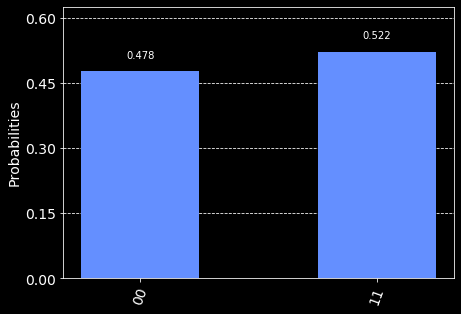

In [12]:
job = q.execute(circuit, backend= sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])